# Regresión

In [80]:
# Importación de librerías y funciones necesarias
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.tree import plot_tree

from matplotlib import pyplot as plt

In [81]:
# Cargamos el dataset, poner la ruta donde tengáis el archivo
df = pd.read_csv('datos/housing.csv')

In [82]:
# Función para ver las primeras 10 filas del dataset
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [83]:
# Función con estadísticos básicos
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Regresión

Objetivo: Predecir la variable 'median_house_value'

Vamos a eliminar la varibale ocean_proximity y trabajar con las demás, además de eliminar las filas que contengan datos faltantes.

Además vamos a eliminar algunos valores extremos de la variable objetivo.

In [84]:
df = df.loc[(df['median_house_value'] < 500000), :]
df = df.drop(columns=['ocean_proximity']).dropna()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


1.- Realiza una representación de la varibale median_house_value, donde en el eje X tengas 'longitude', en el Y 'latitude' y el color venga dado por 'median_house_value'

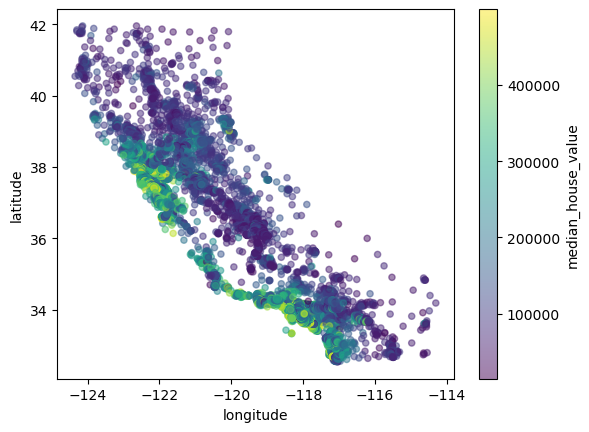

In [85]:
df.plot.scatter(x='longitude', y='latitude', c='median_house_value', alpha = 0.5)
plt.show()

2.- Divide los datos en los conjuntos de entrenamiento y test (recuerda la función 'train_test_split()')

In [86]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9909,-122.30,38.31,34.0,1797.0,395.0,1162.0,407.0,3.4550,137500.0
18709,-122.40,40.58,43.0,1455.0,300.0,747.0,279.0,2.7857,104200.0
9298,-122.56,38.03,34.0,1887.0,290.0,815.0,283.0,6.5249,324800.0
174,-122.24,37.80,52.0,996.0,228.0,731.0,228.0,2.2697,127000.0
16676,-120.68,35.14,34.0,3100.0,617.0,1155.0,542.0,3.0938,245900.0
...,...,...,...,...,...,...,...,...,...
11990,-117.53,33.97,34.0,1293.0,215.0,774.0,217.0,3.8906,141000.0
12679,-121.38,38.55,26.0,1532.0,264.0,781.0,285.0,4.6944,130900.0
5691,-118.24,34.23,43.0,1061.0,208.0,514.0,208.0,6.0100,254200.0
876,-122.01,37.56,6.0,3028.0,778.0,1531.0,736.0,4.4259,158000.0


3.- Ahora necesitamos estandarizar los datos, usa 'StandarScaler()' para estandarizar SOLO las variables predictoras

Ten encuenta también los métodos del scaler y las diferencias entre 'fit' y 'transform'

In [87]:
X = train.drop(columns=['median_house_value'])
y = train['median_house_value']

In [88]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [90]:
scaler.scale_

array([2.00653145e+00, 2.15625199e+00, 1.24883787e+01, 2.15715296e+03,
       4.19048755e+02, 1.14790229e+03, 3.80629480e+02, 1.55541427e+00])

In [94]:
X = scaler.transform(X)
X

array([[-1.35963129,  1.22820047,  0.45047684, ..., -0.24097492,
        -0.24304734, -0.13179309],
       [-1.40946854,  2.28095312,  1.17114685, ..., -0.60250395,
        -0.57933238, -0.56209646],
       [-1.48920813,  1.09834551,  0.45047684, ..., -0.54326546,
        -0.56882347,  1.84189332],
       ...,
       [ 0.66376086, -0.6639717 ,  1.17114685, ..., -0.8054829 ,
        -0.76586549,  1.51085611],
       [-1.21510328,  0.8803747 , -1.79160763, ...,  0.08048101,
         0.6213103 ,  0.4924136 ],
       [-0.52236557, -0.25121846, -0.5104165 , ..., -0.58420971,
        -0.55568734, -0.64612552]])

4.- Genera un modelo de regresión lineal y entrénalo con los datos estandarizados ('LinearRegression()')

In [95]:
model_lr = LinearRegression()
model_lr

LinearRegression()

In [96]:
model_lr.fit(X, y)

LinearRegression()

5.- Usa el método 'predict()' del modelo para obtener las predicciones en entremiento y represéntalas como mejor creas.

¿Qué crees que está pasando?

In [97]:
preds = model_lr.predict(X)
preds

array([191325.86603948,  91024.1106167 , 328328.55227094, ...,
       298883.28071407, 250028.05820388, 204806.22763229])

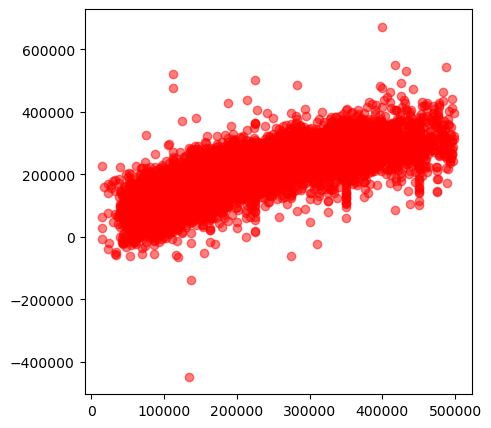

In [92]:
plt.figure(figsize=(5, 5))

#plt.scatter(train['longitude'], train['median_house_value'], alpha = 0.5)
plt.scatter(train['median_house_value'], preds, color='red', alpha = 0.5)

plt.show()

6.- Obtén las métricas del modelo en entrenaiento y test (error cuadrático medio, error absoluto medio, coeficiente R2).

Recuerda las funciones como 'mean_squared_error()' o 'r2_score' o busca nuevas en la documentación de scikit-learn

In [98]:
print('Intercept: ', model_lr.intercept_)

print('Coefficientes: ', model_lr.coef_)

print('RMSE: ', mean_squared_error(y, model_lr.predict(X)))

print('R2: ', r2_score(y, model_lr.predict(X)))

Intercept:  191278.51289208897
Coefficientes:  [-78397.11992274 -82452.75355059  12807.18753996 -22908.95437374
  46952.25055627 -32754.13378226  13578.5076292   62512.53152823]
RMSE:  3726815768.4536195
R2:  0.601944172510287


In [99]:
X = test.drop(columns=['median_house_value'])
y = test['median_house_value']

X = scaler.transform(X)

In [100]:
print('RMSE: ', mean_squared_error(y, model_lr.predict(X)))

print('R2: ', r2_score(y, model_lr.predict(X)))

RMSE:  3765541069.952536
R2:  0.6066632964732324


## Decision tree

Vamos a realizar lo mismo pero con un modelo de árbol de decisión

1.- Selecciona un número limitado de observaciones para construir un árbol que se pueda visualizar (quédate con entre 5 y 10 muestras)

In [101]:
datos = train.sample(10, random_state=42)
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15386,-117.03,33.32,14.0,1088.0,209.0,601.0,193.0,3.8438,243800.0
19602,-121.02,37.58,36.0,1285.0,270.0,706.0,273.0,1.7169,121400.0
15986,-122.47,37.76,48.0,2064.0,484.0,1055.0,467.0,2.8711,329600.0
7702,-118.13,33.96,36.0,1933.0,341.0,958.0,335.0,4.4732,266000.0
2055,-119.76,36.68,29.0,1243.0,312.0,836.0,277.0,1.8355,74200.0
7799,-118.08,33.90,42.0,1768.0,372.0,1155.0,368.0,3.5580,161100.0
17750,-121.84,37.33,28.0,1535.0,330.0,1937.0,317.0,4.1146,160100.0
20435,-118.64,34.25,47.0,1315.0,290.0,581.0,268.0,5.4024,253000.0
2732,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,69400.0
8947,-118.45,34.02,45.0,1230.0,201.0,565.0,219.0,6.3521,493400.0


2.- Crea un modelo de árbol de decisión para regresión ('DecisionTreeRegressor()') y entrénalo con los datos seleccionados.

Ten en cuenta los parámetros más importantes, echa un ojo a la documentación.

In [102]:
model_dt = DecisionTreeRegressor(min_samples_split=3)

model_dt.fit(X=datos.drop(columns=['median_house_value']), y=datos['median_house_value'])

DecisionTreeRegressor(min_samples_split=3)

3.- Representa el árbol de decisión ('plot_tree()'). 

En la documentación puedes ver la explicación de los parámetros si necesitas alguno para mejorar la visualización.

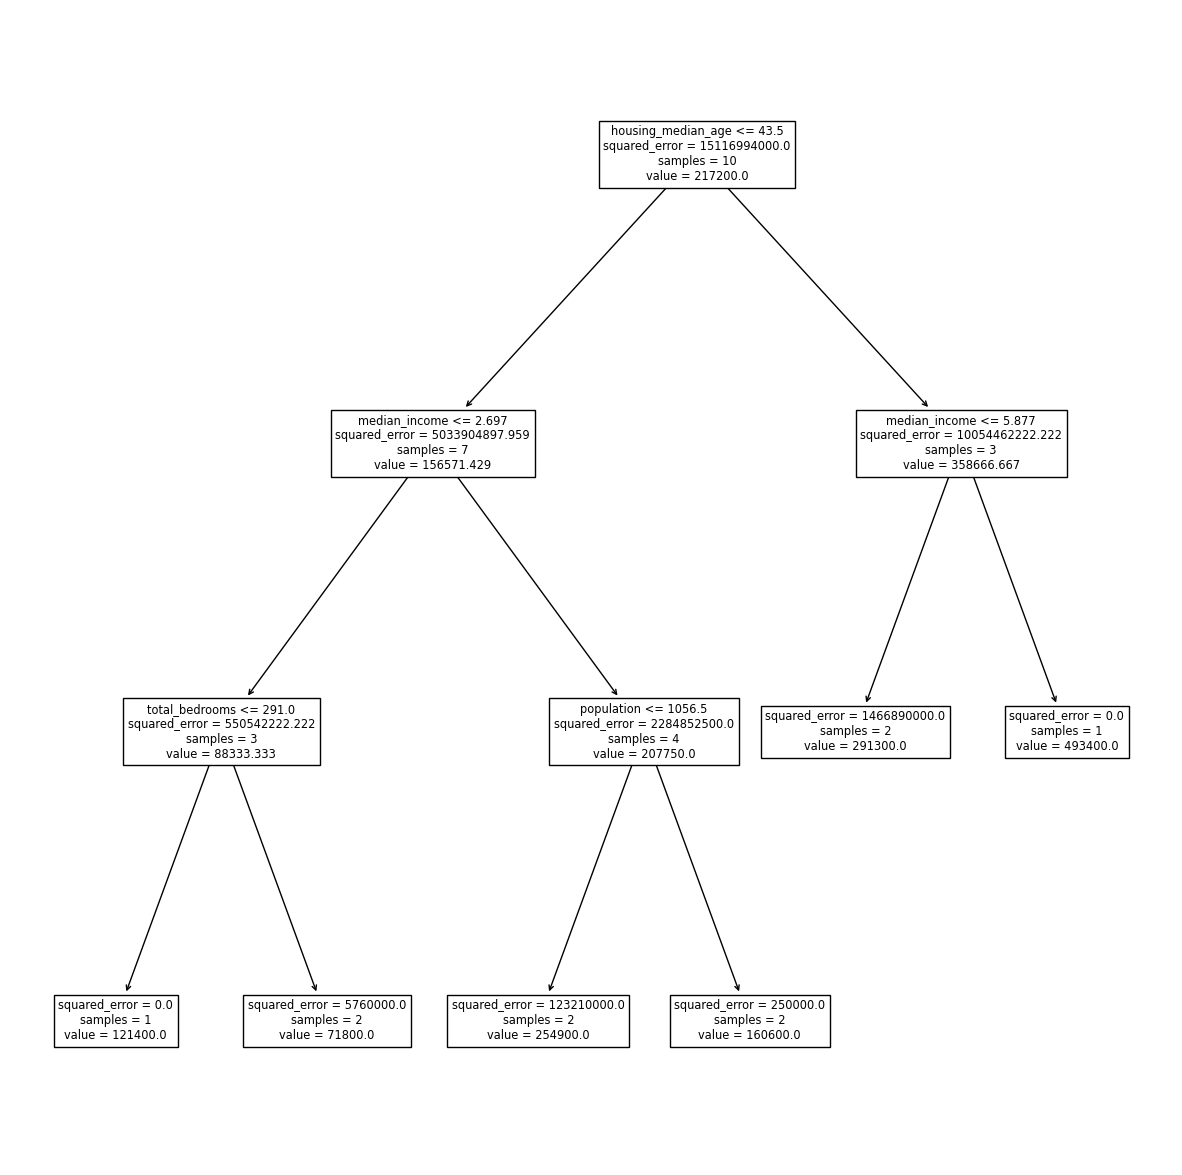

In [106]:
plt.figure(figsize=(15, 15))
plot_tree(model_dt, feature_names=datos.columns, impurity=True)
plt.show()

4.- Mide el error cometido y el coeficiente R2 de este árbol sobre el conjunto de test

In [107]:
predictions = model_dt.predict(test.drop(columns=['median_house_value']))

print('RMSE: ', mean_squared_error(test['median_house_value'], predictions))

print('R2: ', r2_score(test['median_house_value'], predictions))

RMSE:  10761816661.525278
R2:  -0.12414588261472681


5.- Entrena ahora un árbol con todos los datos de entrenamiento e intenta graficarlo (si te es posible).

Recuerda que ya hemos dividido anteriormente el conjunto en entrenamiento y test, si no, no podríamos comparar los resultados entre modelos.

In [108]:
model_dtc = DecisionTreeRegressor(min_samples_split=50)

model_dtc.fit(X=train.drop(columns=['median_house_value']), y=train['median_house_value'])

DecisionTreeRegressor(min_samples_split=50)

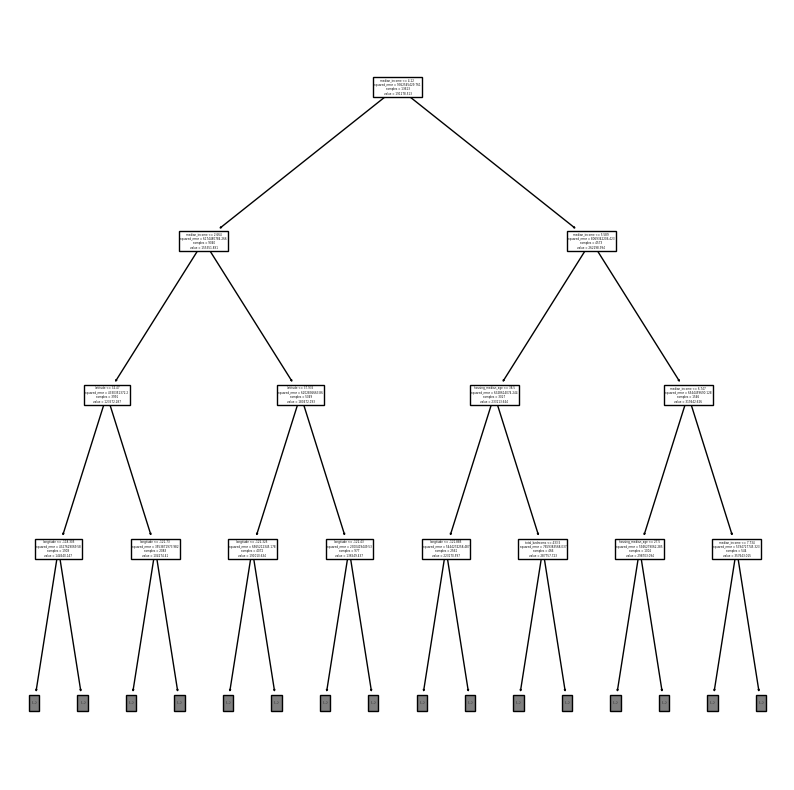

In [111]:
plt.figure(figsize=(10, 10))
plot_tree(model_dtc, feature_names=train.columns, max_depth=3, impurity=True)
plt.show()

6.- Obtén las métricas del modelo en entrenaiento y test (error cuadrático medio, error absoluto medio, coeficiente R2).

Recuerda las funciones como 'mean_squared_error()' o 'r2_score' o busca nuevas en la documentación de scikit-learn

In [24]:
predictions = model_dtc.predict(train.drop(columns=['median_house_value']))

print('RMSE: ', mean_squared_error(train['median_house_value'], predictions))

print('R2: ', r2_score(train['median_house_value'], predictions))

RMSE:  2164206697.773145
R2:  0.7688441979791442


In [25]:
predictions = model_dtc.predict(test.drop(columns=['median_house_value']))

print('RMSE: ', mean_squared_error(test['median_house_value'], predictions))
print('R2: ', r2_score(test['median_house_value'], predictions))

RMSE:  2826399448.9814444
R2:  0.7047631080209552


7.- Compara ahora los resultados en test entre la regresión lineal, el árbol con muestras limitadas y el árbol entrenado con todos los datos.

In [26]:
predictions = model_lr.predict(scaler.transform(test.drop(columns=['median_house_value'])))
print('Regresión lineal:')
print('RMSE: ', mean_squared_error(test['median_house_value'], predictions))
print('R2: ', r2_score(test['median_house_value'], predictions))

predictions = model_dt.predict(test.drop(columns=['median_house_value']))
print('Árbol pequeño:')
print('RMSE: ', mean_squared_error(test['median_house_value'], predictions))
print('R2: ', r2_score(test['median_house_value'], predictions))

predictions = model_dtc.predict(test.drop(columns=['median_house_value']))
print('Árbol completo:')
print('RMSE: ', mean_squared_error(test['median_house_value'], predictions))
print('R2: ', r2_score(test['median_house_value'], predictions))

Regresión lineal:
RMSE:  3765541069.952536
R2:  0.6066632964732324
Árbol pequeño:
RMSE:  10394006522.707798
R2:  -0.08572557997067287
Árbol completo:
RMSE:  2826399448.9814444
R2:  0.7047631080209552


## Random Forest

Vamos a continuar con el Random Forest para regresión

1.- Selecciona un número limitado de observaciones para construir árboles que se pueda visualizar (quédate con entre 5 y 10 muestras)

In [115]:
datos = train.sample(10, random_state=42)
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15386,-117.03,33.32,14.0,1088.0,209.0,601.0,193.0,3.8438,243800.0
19602,-121.02,37.58,36.0,1285.0,270.0,706.0,273.0,1.7169,121400.0
15986,-122.47,37.76,48.0,2064.0,484.0,1055.0,467.0,2.8711,329600.0
7702,-118.13,33.96,36.0,1933.0,341.0,958.0,335.0,4.4732,266000.0
2055,-119.76,36.68,29.0,1243.0,312.0,836.0,277.0,1.8355,74200.0
7799,-118.08,33.90,42.0,1768.0,372.0,1155.0,368.0,3.5580,161100.0
17750,-121.84,37.33,28.0,1535.0,330.0,1937.0,317.0,4.1146,160100.0
20435,-118.64,34.25,47.0,1315.0,290.0,581.0,268.0,5.4024,253000.0
2732,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,69400.0
8947,-118.45,34.02,45.0,1230.0,201.0,565.0,219.0,6.3521,493400.0


2.- Crea un modelo de random forest para regresión ('RandomForestRegressor()') y entrénalo con los datos seleccionados. Fija el parámetro necesario para que haya un total de 9 árboles.

Ten en cuenta los parámetros más importantes, echa un ojo a la documentación.

In [116]:
model_rf = RandomForestRegressor(n_estimators=9)

model_rf.fit(X=datos.drop(columns=['median_house_value']), y=datos['median_house_value'])

RandomForestRegressor(n_estimators=9)

3.- Ejecuta este código para representar los 9 árboles de tu random forest.

C:\Users\Regino\AppData\Local\Temp\ipykernel_14248\2342556501.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


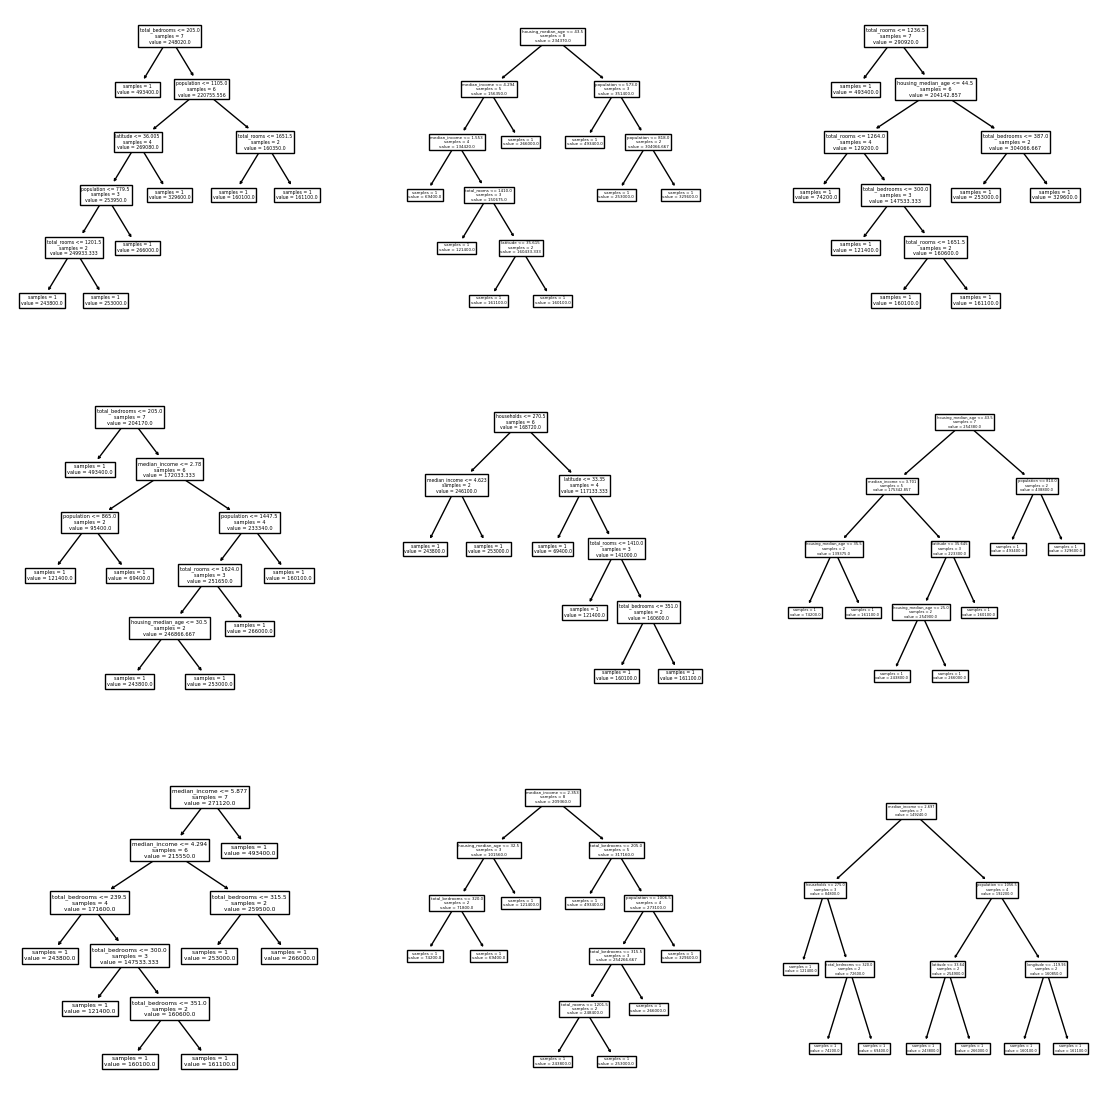

In [117]:
def get_grid(k, n):
    return k // n, k % n
fig, ax = plt.subplots(figsize=(14, 14), nrows=3, ncols=3)

# IMPORTANTE
# En enumerate(model_rf.estimators_) tienes que sustituir model_rf por el nombre que le hayas puesto a tu modelo
for k, tree in enumerate(model_rf.estimators_):
    i, j = get_grid(k, 3)
    plot_tree(tree, feature_names=datos.columns, impurity=False, ax=ax[i][j])
fig.show()

4.- Mide el error cometido y el coeficiente R2 de este random forest sobre el conjunto de test

In [118]:
predictions = model_rf.predict(test.drop(columns=['median_house_value']))

print('RMSE: ', mean_squared_error(test['median_house_value'], predictions))

print('R2: ', r2_score(test['median_house_value'], predictions))

RMSE:  9608004627.249357
R2:  -0.003622267649261657


5.- Entrena ahora un random forest con todos los datos de entrenamiento.

Recuerda que ya hemos dividido anteriormente el conjunto en entrenamiento y test, si no, no podríamos comparar los resultados entre modelos.

In [123]:
model_rfc = RandomForestRegressor(n_estimators=20, min_samples_split=50, random_state=42)

model_rfc.fit(X=train.drop(columns=['median_house_value']), y=train['median_house_value'])

RandomForestRegressor(min_samples_split=50, n_estimators=20, random_state=42)

In [135]:
train.drop(columns=['median_house_value'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9909,-122.30,38.31,34.0,1797.0,395.0,1162.0,407.0,3.4550
18709,-122.40,40.58,43.0,1455.0,300.0,747.0,279.0,2.7857
9298,-122.56,38.03,34.0,1887.0,290.0,815.0,283.0,6.5249
174,-122.24,37.80,52.0,996.0,228.0,731.0,228.0,2.2697
16676,-120.68,35.14,34.0,3100.0,617.0,1155.0,542.0,3.0938
...,...,...,...,...,...,...,...,...
11990,-117.53,33.97,34.0,1293.0,215.0,774.0,217.0,3.8906
12679,-121.38,38.55,26.0,1532.0,264.0,781.0,285.0,4.6944
5691,-118.24,34.23,43.0,1061.0,208.0,514.0,208.0,6.0100
876,-122.01,37.56,6.0,3028.0,778.0,1531.0,736.0,4.4259


6.- Obtén las métricas del modelo en entrenamiento y test (error cuadrático medio, error absoluto medio, coeficiente R2).

Recuerda las funciones como 'mean_squared_error()' o 'r2_score' o busca nuevas en la documentación de scikit-learn

In [124]:
predictions = model_rfc.predict(train.drop(columns=['median_house_value']))

print('RMSE: ', mean_squared_error(train['median_house_value'], predictions))

print('R2: ', r2_score(train['median_house_value'], predictions))

RMSE:  1689942990.1043801
R2:  0.819499621894226


In [125]:
predictions = model_rfc.predict(test.drop(columns=['median_house_value']))

print('RMSE: ', mean_squared_error(test['median_house_value'], predictions))
print('R2: ', r2_score(test['median_house_value'], predictions))

RMSE:  2231228477.684285
R2:  0.7669328157829794


7.- Compara ahora los resultados en test con los modelos anteriores.

In [126]:
predictions = model_lr.predict(scaler.transform(test.drop(columns=['median_house_value'])))
print('Regresión lineal:')
print('RMSE: ', mean_squared_error(test['median_house_value'], predictions))
print('R2: ', r2_score(test['median_house_value'], predictions))

predictions = model_dt.predict(test.drop(columns=['median_house_value']))
print('Árbol pequeño:')
print('RMSE: ', mean_squared_error(test['median_house_value'], predictions))
print('R2: ', r2_score(test['median_house_value'], predictions))

predictions = model_dtc.predict(test.drop(columns=['median_house_value']))
print('Árbol completo:')
print('RMSE: ', mean_squared_error(test['median_house_value'], predictions))
print('R2: ', r2_score(test['median_house_value'], predictions))

predictions = model_rf.predict(test.drop(columns=['median_house_value']))
print('Random forest pequeño:')
print('RMSE: ', mean_squared_error(test['median_house_value'], predictions))
print('R2: ', r2_score(test['median_house_value'], predictions))

predictions = model_rfc.predict(test.drop(columns=['median_house_value']))
print('Random forest completo:')
print('RMSE: ', mean_squared_error(test['median_house_value'], predictions))
print('R2: ', r2_score(test['median_house_value'], predictions))

Regresión lineal:
RMSE:  3765541069.952536
R2:  0.6066632964732324
Árbol pequeño:
RMSE:  10761816661.525278
R2:  -0.12414588261472681
Árbol completo:
RMSE:  2831183431.3599396
R2:  0.7042633881072613
Random forest pequeño:
RMSE:  9608004627.249357
R2:  -0.003622267649261657
Random forest completo:
RMSE:  2231228477.684285
R2:  0.7669328157829794


In [130]:
model_rf.criterion

'squared_error'

# Clasificación

Continuamos ahora con los modelos para clasificación

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score

Vamos a discretizar nuestra variable objetivo con ayuda del método de pandas 'qcut' para crear una variable categórica de 5 niveles.

Eliminamos también la original 'median_house_value'.

In [36]:
df['median_house_value_discrete'] = pd.qcut(df['median_house_value'], 5, labels=[0, 1, 2, 3, 4])
df = df.drop(columns=['median_house_value'])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value_discrete
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,4
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0


Ahora tenemos 'median_house_value_discrete' que es una variable con 5 categorías con más o menos el mismo número de muestras.

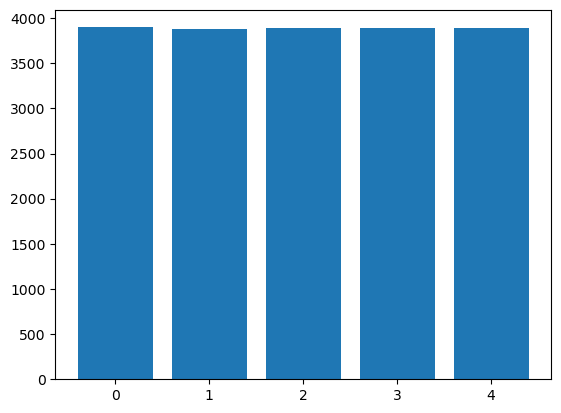

In [37]:
aux = np.unique(df['median_house_value_discrete'], return_counts=True)
plt.bar(aux[0], aux[1])
plt.show()

1.- Divide los datos en los conjuntos de entrenamiento y test (recuerda la función 'train_test_split()')

In [38]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value_discrete
9909,-122.30,38.31,34.0,1797.0,395.0,1162.0,407.0,3.4550,1
18709,-122.40,40.58,43.0,1455.0,300.0,747.0,279.0,2.7857,0
9298,-122.56,38.03,34.0,1887.0,290.0,815.0,283.0,6.5249,4
174,-122.24,37.80,52.0,996.0,228.0,731.0,228.0,2.2697,1
16676,-120.68,35.14,34.0,3100.0,617.0,1155.0,542.0,3.0938,3
...,...,...,...,...,...,...,...,...,...
11990,-117.53,33.97,34.0,1293.0,215.0,774.0,217.0,3.8906,1
12679,-121.38,38.55,26.0,1532.0,264.0,781.0,285.0,4.6944,1
5691,-118.24,34.23,43.0,1061.0,208.0,514.0,208.0,6.0100,3
876,-122.01,37.56,6.0,3028.0,778.0,1531.0,736.0,4.4259,2


3.- Ahora necesitamos estandarizar los datos, usa 'StandarScaler()' para estandarizar SOLO las variables predictoras

Ten encuenta también los métodos del scaler y las diferencias entre 'fit' y 'transform'

In [39]:
X = train.drop(columns=['median_house_value_discrete'])
y = train['median_house_value_discrete']

In [40]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [41]:
X = scaler.transform(X)
X

array([[-1.35963129,  1.22820047,  0.45047684, ..., -0.24097492,
        -0.24304734, -0.13179309],
       [-1.40946854,  2.28095312,  1.17114685, ..., -0.60250395,
        -0.57933238, -0.56209646],
       [-1.48920813,  1.09834551,  0.45047684, ..., -0.54326546,
        -0.56882347,  1.84189332],
       ...,
       [ 0.66376086, -0.6639717 ,  1.17114685, ..., -0.8054829 ,
        -0.76586549,  1.51085611],
       [-1.21510328,  0.8803747 , -1.79160763, ...,  0.08048101,
         0.6213103 ,  0.4924136 ],
       [-0.52236557, -0.25121846, -0.5104165 , ..., -0.58420971,
        -0.55568734, -0.64612552]])

4.- Genera un modelo de regresión logística y entrénalo con los datos estandarizados ('LogisticRegression()')

In [42]:
model_lr = LogisticRegression(max_iter=1000)
model_lr

LogisticRegression(max_iter=1000)

In [43]:
model_lr.fit(X, y)

LogisticRegression(max_iter=1000)

5.- Obtén las métricas del modelo en entrenamiento y test.

Recuerda las funciones 'ConfusionMatrixDisplay'

In [44]:
print('Intercept: ', model_lr.intercept_)

print('Coefficientes: ', model_lr.coef_)

Intercept:  [-0.91688497  0.57001386  0.84113996  0.46604237 -0.96031122]
Coefficientes:  [[ 3.51516891  3.83998956 -0.16711899  1.26963065 -2.19892108  0.95842689
  -0.14458557 -2.68667799]
 [ 1.74992576  1.89858156 -0.26115674  0.28335374 -0.45054792  0.92838279
  -0.74723262 -0.91579341]
 [ 0.14076158  0.10230997 -0.14121731 -0.6869224   0.66710328  0.73627069
  -0.73147834  0.21652812]
 [-1.63876298 -1.73385312  0.09382322 -0.67190105  1.00198278 -0.36329676
   0.13568822  1.1384472 ]
 [-3.76709327 -4.10702797  0.47566982 -0.19416094  0.98038294 -2.25978361
   1.48760831  2.24749608]]


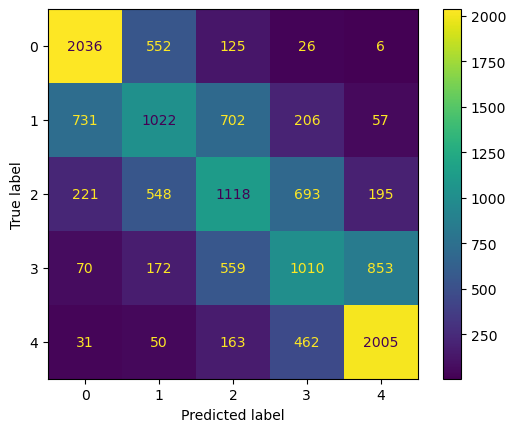

In [45]:
predictions = model_lr.predict(scaler.transform(train.drop(columns=['median_house_value_discrete'])))

ConfusionMatrixDisplay.from_predictions(train['median_house_value_discrete'], predictions)
plt.show()

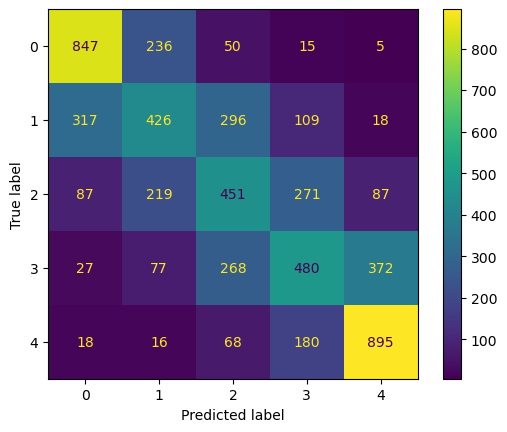

In [46]:
predictions = model_lr.predict(scaler.transform(test.drop(columns=['median_house_value_discrete'])))

ConfusionMatrixDisplay.from_predictions(test['median_house_value_discrete'], predictions)
plt.show()

6.- Con el siguiente código podemos generar las curvas ROC y el AUC correspondiente

El método de pandas 'get_dummies' nos realiza el one hot encoding de nuestra variable categórica.

Esto es pasar de una variable con 5 valores (entre 0 y 4 dependiendo de la categoría)

In [47]:
test.median_house_value_discrete

9538     0
20231    4
9526     0
4222     3
20008    0
        ..
6609     2
20591    0
6156     1
14897    0
3710     2
Name: median_house_value_discrete, Length: 5835, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

A 5 variables con ceros cuando no pertenece a esa categoría y unos cuando sí lo hace

In [48]:
pd.get_dummies(test.median_house_value_discrete)

,0,1,2,3,4
9538,1,0,0,0,0
20231,0,0,0,0,1
9526,1,0,0,0,0
4222,0,0,0,1,0
20008,1,0,0,0,0
...,...,...,...,...,...
6609,0,0,1,0,0
20591,1,0,0,0,0
6156,0,1,0,0,0
14897,1,0,0,0,0


In [49]:
# Recuerda sustituir model_lr por el nombre de tu modelo
predictions = model_lr.predict_proba(scaler.transform(train.drop(columns=['median_house_value_discrete'])))

y_test = np.array(pd.get_dummies(train['median_house_value_discrete']))
y_score = predictions

n_classes = 5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], umbral = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

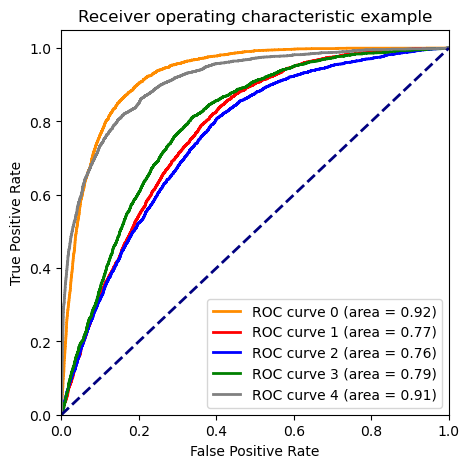

In [50]:
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve 0 (area = %0.2f)" % roc_auc[0],
)
plt.plot(
    fpr[1],
    tpr[1],
    color="red",
    lw=lw,
    label="ROC curve 1 (area = %0.2f)" % roc_auc[1],
)
plt.plot(
    fpr[2],
    tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve 2 (area = %0.2f)" % roc_auc[2],
)
plt.plot(
    fpr[3],
    tpr[3],
    color="green",
    lw=lw,
    label="ROC curve 3 (area = %0.2f)" % roc_auc[3],
)
plt.plot(
    fpr[4],
    tpr[4],
    color="grey",
    lw=lw,
    label="ROC curve 4 (area = %0.2f)" % roc_auc[4],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

7.- Repetimos pero con los datos de test

In [51]:
# Recuerda sustituir model_lr por el nombre de tu modelo
predictions = model_lr.predict_proba(scaler.transform(test.drop(columns=['median_house_value_discrete'])))

y_test = np.array(pd.get_dummies(test['median_house_value_discrete']))
y_score = predictions

n_classes = 5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], umbral = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

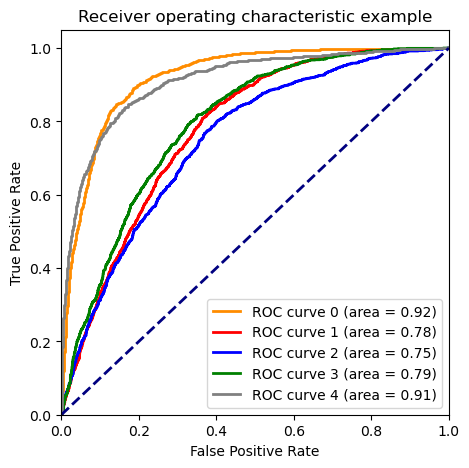

In [52]:
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve 0 (area = %0.2f)" % roc_auc[0],
)
plt.plot(
    fpr[1],
    tpr[1],
    color="red",
    lw=lw,
    label="ROC curve 1 (area = %0.2f)" % roc_auc[1],
)
plt.plot(
    fpr[2],
    tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve 2 (area = %0.2f)" % roc_auc[2],
)
plt.plot(
    fpr[3],
    tpr[3],
    color="green",
    lw=lw,
    label="ROC curve 3 (area = %0.2f)" % roc_auc[3],
)
plt.plot(
    fpr[4],
    tpr[4],
    color="grey",
    lw=lw,
    label="ROC curve 4 (area = %0.2f)" % roc_auc[4],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Decision tree

Pasamos ahora al árbol de decisión para clasificación

1.- Selecciona un número limitado de observaciones para construir un árbol que se pueda visualizar (quédate con entre 5 y 10 muestras)

In [53]:
datos = train.sample(10, random_state=42)
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value_discrete
15386,-117.03,33.32,14.0,1088.0,209.0,601.0,193.0,3.8438,3
19602,-121.02,37.58,36.0,1285.0,270.0,706.0,273.0,1.7169,1
15986,-122.47,37.76,48.0,2064.0,484.0,1055.0,467.0,2.8711,4
7702,-118.13,33.96,36.0,1933.0,341.0,958.0,335.0,4.4732,3
2055,-119.76,36.68,29.0,1243.0,312.0,836.0,277.0,1.8355,0
7799,-118.08,33.90,42.0,1768.0,372.0,1155.0,368.0,3.5580,2
17750,-121.84,37.33,28.0,1535.0,330.0,1937.0,317.0,4.1146,2
20435,-118.64,34.25,47.0,1315.0,290.0,581.0,268.0,5.4024,3
2732,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,0
8947,-118.45,34.02,45.0,1230.0,201.0,565.0,219.0,6.3521,4


2.- Crea un modelo de árbol de decisión para regresión ('DecisionTreeClassifier()') y entrénalo con los datos seleccionados.

Ten en cuenta los parámetros más importantes, echa un ojo a la documentación.

In [54]:
model_dt = DecisionTreeClassifier(min_samples_split=3)

model_dt.fit(X=datos.drop(columns=['median_house_value_discrete']), y=datos['median_house_value_discrete'])

DecisionTreeClassifier(min_samples_split=3)

3.- Representa el árbol de decisión ('plot_tree()'). 

En la documentación puedes ver la explicación de los parámetros si necesitas alguno para mejorar la visualización.

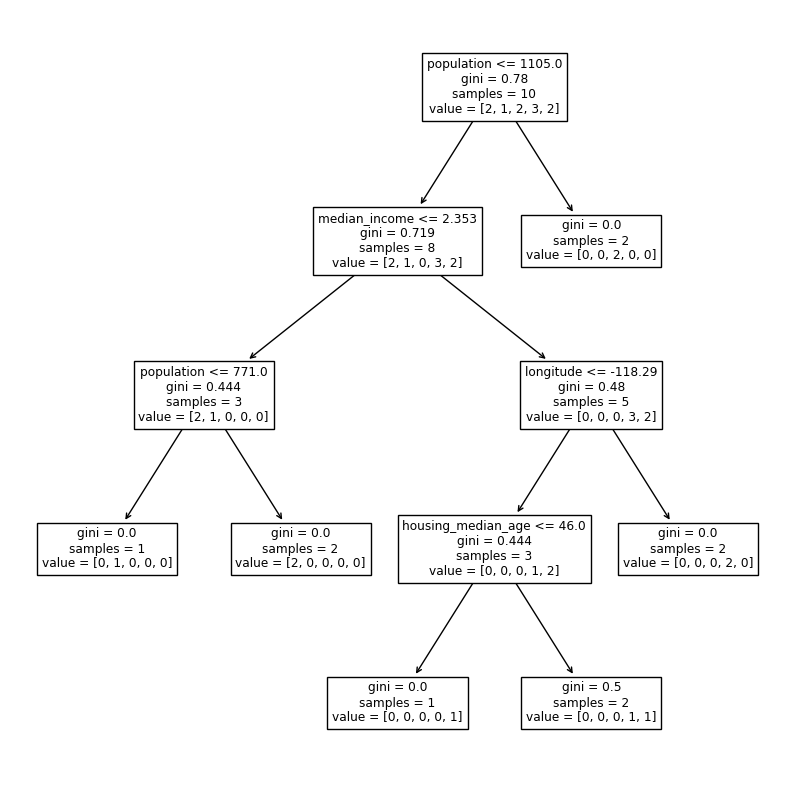

In [55]:
plt.figure(figsize=(10, 10))
plot_tree(model_dt, feature_names=datos.columns, impurity=True)
plt.show()

4.- Obtén la matriz de confusión de este árbol sobre el conjunto de test

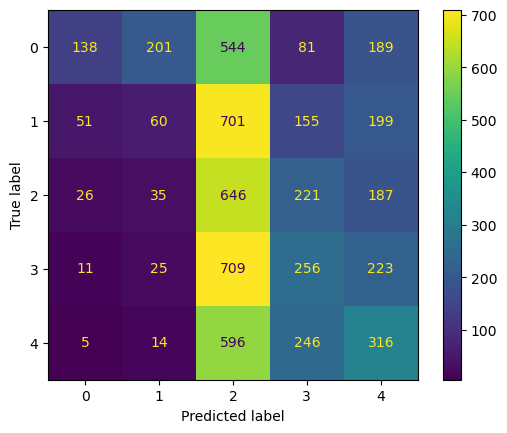

In [56]:
predictions = model_dt.predict(test.drop(columns=['median_house_value_discrete']))

ConfusionMatrixDisplay.from_predictions(test['median_house_value_discrete'], predictions)
plt.show()

5.- Entrena ahora un árbol con todos los datos de entrenamiento e intenta graficarlo (si te es posible).

Recuerda que ya hemos dividido anteriormente el conjunto en entrenamiento y test, si no, no podríamos comparar los resultados entre modelos.

In [57]:
model_dtc = DecisionTreeClassifier(min_samples_split=100)

model_dtc.fit(X=train.drop(columns=['median_house_value_discrete']), y=train['median_house_value_discrete'])

DecisionTreeClassifier(min_samples_split=100)

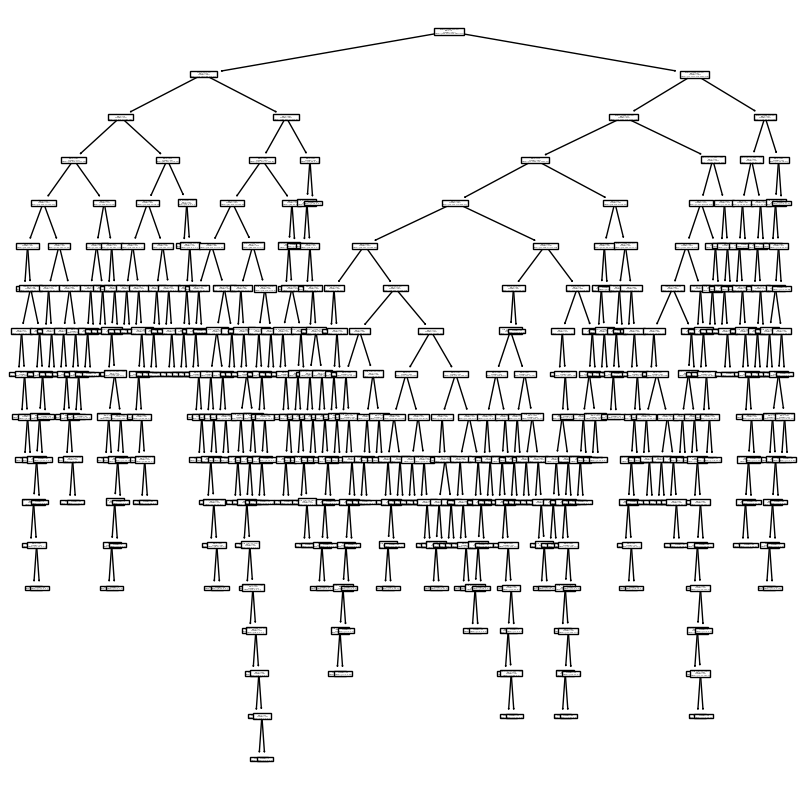

In [58]:
plt.figure(figsize=(10, 10))
plot_tree(model_dtc, feature_names=train.columns, impurity=True)
plt.show()

6.- Obtén la matriz de confusión del modelo en entrenaiento y test.

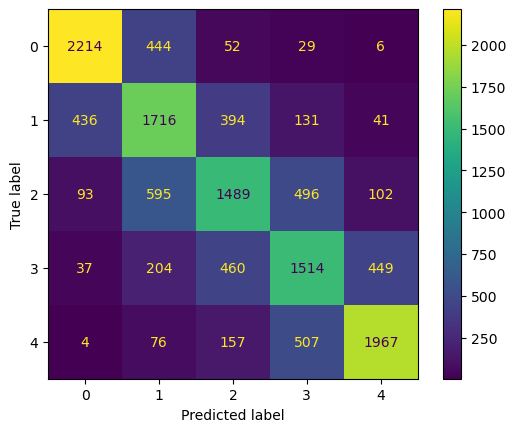

In [59]:
predictions = model_dtc.predict(train.drop(columns=['median_house_value_discrete']))

ConfusionMatrixDisplay.from_predictions(train['median_house_value_discrete'], predictions)
plt.show()

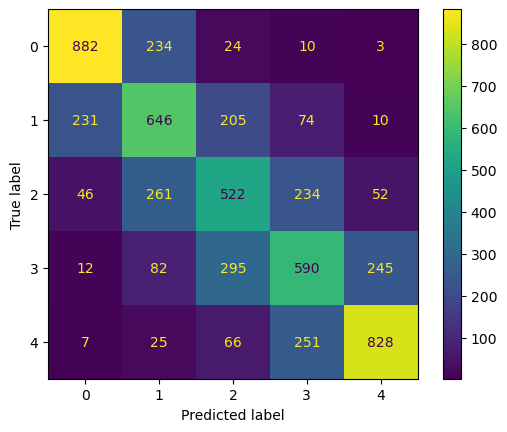

In [60]:
predictions = model_dtc.predict(test.drop(columns=['median_house_value_discrete']))

ConfusionMatrixDisplay.from_predictions(test['median_house_value_discrete'], predictions)
plt.show()

7.- Con el siguiente código podemos generar las curvas ROC y el AUC correspondiente

El método de pandas 'get_dummies' nos realiza el one hot encoding de nuestra variable categórica.

Esto es pasar de una variable con 5 valores (entre 0 y 4 dependiendo de la categoría)

In [61]:
test.median_house_value_discrete

9538     0
20231    4
9526     0
4222     3
20008    0
        ..
6609     2
20591    0
6156     1
14897    0
3710     2
Name: median_house_value_discrete, Length: 5835, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

A 5 variables con ceros cuando no pertenece a esa categoría y unos cuando sí lo hace

In [62]:
pd.get_dummies(test.median_house_value_discrete)

,0,1,2,3,4
9538,1,0,0,0,0
20231,0,0,0,0,1
9526,1,0,0,0,0
4222,0,0,0,1,0
20008,1,0,0,0,0
...,...,...,...,...,...
6609,0,0,1,0,0
20591,1,0,0,0,0
6156,0,1,0,0,0
14897,1,0,0,0,0


In [63]:
# Recuerda sustituir model_dtc por el nombre de tu modelo
predictions = model_dtc.predict_proba(train.drop(columns=['median_house_value_discrete']))

y_test = np.array(pd.get_dummies(train['median_house_value_discrete']))
y_score = predictions

n_classes = 5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], umbral = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

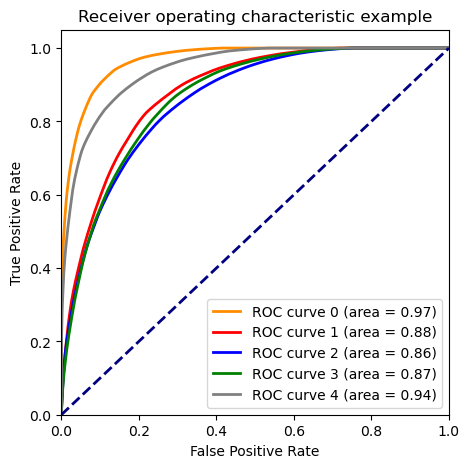

In [64]:
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve 0 (area = %0.2f)" % roc_auc[0],
)
plt.plot(
    fpr[1],
    tpr[1],
    color="red",
    lw=lw,
    label="ROC curve 1 (area = %0.2f)" % roc_auc[1],
)
plt.plot(
    fpr[2],
    tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve 2 (area = %0.2f)" % roc_auc[2],
)
plt.plot(
    fpr[3],
    tpr[3],
    color="green",
    lw=lw,
    label="ROC curve 3 (area = %0.2f)" % roc_auc[3],
)
plt.plot(
    fpr[4],
    tpr[4],
    color="grey",
    lw=lw,
    label="ROC curve 4 (area = %0.2f)" % roc_auc[4],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

7.- Repetimos pero con los datos de test

In [65]:
# Recuerda sustituir model_dtc por el nombre de tu modelo
predictions = model_dtc.predict_proba(test.drop(columns=['median_house_value_discrete']))

y_test = np.array(pd.get_dummies(test['median_house_value_discrete']))
y_score = predictions

n_classes = 5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], umbral = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

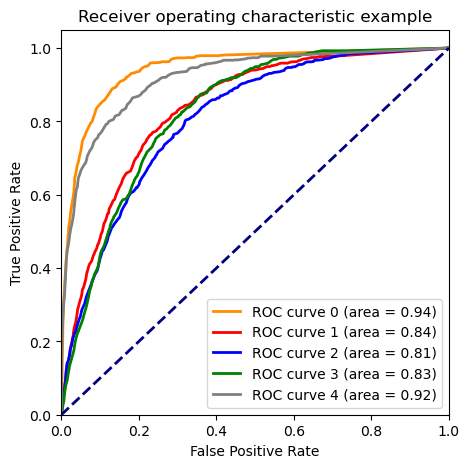

In [66]:
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve 0 (area = %0.2f)" % roc_auc[0],
)
plt.plot(
    fpr[1],
    tpr[1],
    color="red",
    lw=lw,
    label="ROC curve 1 (area = %0.2f)" % roc_auc[1],
)
plt.plot(
    fpr[2],
    tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve 2 (area = %0.2f)" % roc_auc[2],
)
plt.plot(
    fpr[3],
    tpr[3],
    color="green",
    lw=lw,
    label="ROC curve 3 (area = %0.2f)" % roc_auc[3],
)
plt.plot(
    fpr[4],
    tpr[4],
    color="grey",
    lw=lw,
    label="ROC curve 4 (area = %0.2f)" % roc_auc[4],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Random forest

1.- Selecciona un número limitado de observaciones para construir un árbol que se pueda visualizar (quédate con entre 5 y 10 muestras)

In [67]:
datos = train.sample(10, random_state=42)
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value_discrete
15386,-117.03,33.32,14.0,1088.0,209.0,601.0,193.0,3.8438,3
19602,-121.02,37.58,36.0,1285.0,270.0,706.0,273.0,1.7169,1
15986,-122.47,37.76,48.0,2064.0,484.0,1055.0,467.0,2.8711,4
7702,-118.13,33.96,36.0,1933.0,341.0,958.0,335.0,4.4732,3
2055,-119.76,36.68,29.0,1243.0,312.0,836.0,277.0,1.8355,0
7799,-118.08,33.90,42.0,1768.0,372.0,1155.0,368.0,3.5580,2
17750,-121.84,37.33,28.0,1535.0,330.0,1937.0,317.0,4.1146,2
20435,-118.64,34.25,47.0,1315.0,290.0,581.0,268.0,5.4024,3
2732,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,0
8947,-118.45,34.02,45.0,1230.0,201.0,565.0,219.0,6.3521,4


2.- Crea un modelo de random forest para regresión ('RandomForestClassifier()') y entrénalo con los datos seleccionados. Fija el parámetro necesario para que haya un total de 9 árboles.

Ten en cuenta los parámetros más importantes, echa un ojo a la documentación.

In [68]:
model_rf = RandomForestClassifier(n_estimators=9, random_state=42)

model_rf.fit(X=datos.drop(columns=['median_house_value_discrete']), y=datos['median_house_value_discrete'])

RandomForestClassifier(n_estimators=9, random_state=42)

3.- Ejecuta este código para representar los 9 árboles de tu random forest.

C:\Users\Regino\AppData\Local\Temp\ipykernel_14248\2342556501.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


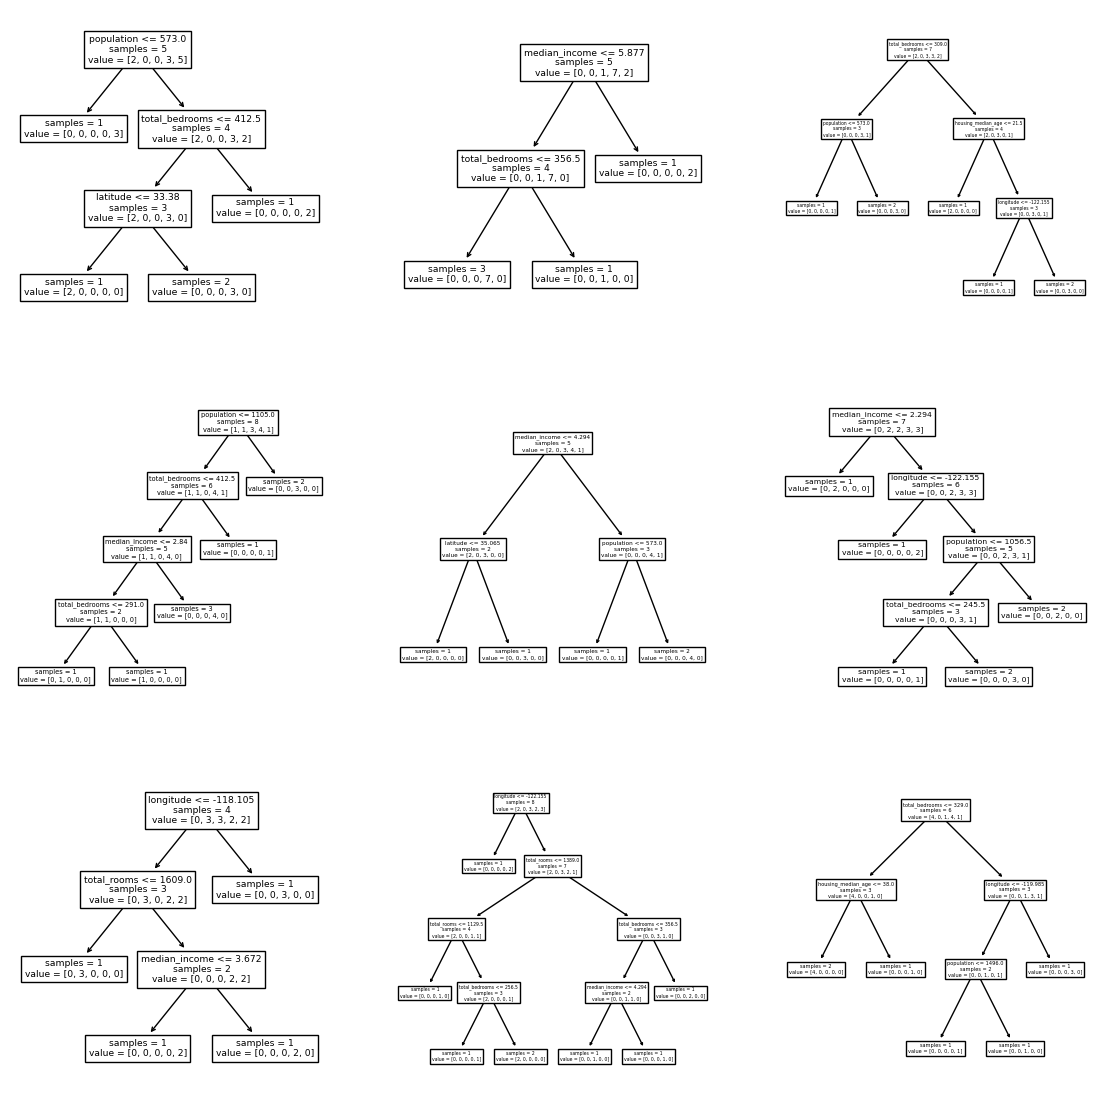

In [69]:
def get_grid(k, n):
    return k // n, k % n
fig, ax = plt.subplots(figsize=(14, 14), nrows=3, ncols=3)

# IMPORTANTE
# En enumerate(model_rf.estimators_) tienes que sustituir model_rf por el nombre que le hayas puesto a tu modelo
for k, tree in enumerate(model_rf.estimators_):
    i, j = get_grid(k, 3)
    plot_tree(tree, feature_names=datos.columns, impurity=False, ax=ax[i][j])
fig.show()

4.- Obtén la matriz de confusión de este árbol sobre el conjunto de test

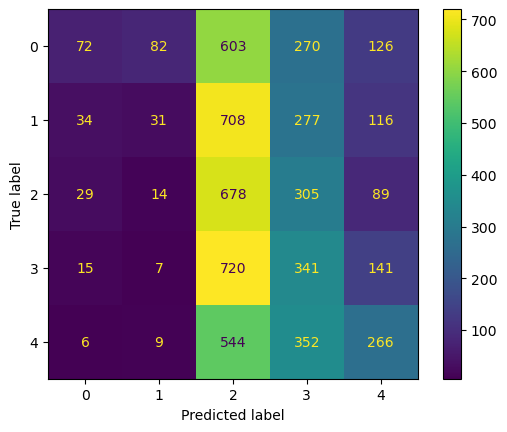

In [70]:
predictions = model_rf.predict(test.drop(columns=['median_house_value_discrete']))

ConfusionMatrixDisplay.from_predictions(test['median_house_value_discrete'], predictions)
plt.show()

5.- Entrena ahora un random forest con todos los datos de entrenamiento.

Recuerda que ya hemos dividido anteriormente el conjunto en entrenamiento y test, si no, no podríamos comparar los resultados entre modelos.

In [71]:
model_rfc = RandomForestClassifier(n_estimators=20, min_samples_split=100, random_state=42)

model_rfc.fit(X=train.drop(columns=['median_house_value_discrete']), y=train['median_house_value_discrete'])

RandomForestClassifier(min_samples_split=100, n_estimators=20, random_state=42)

6.- Obtén la matriz de confusión del modelo en entrenaiento y test.

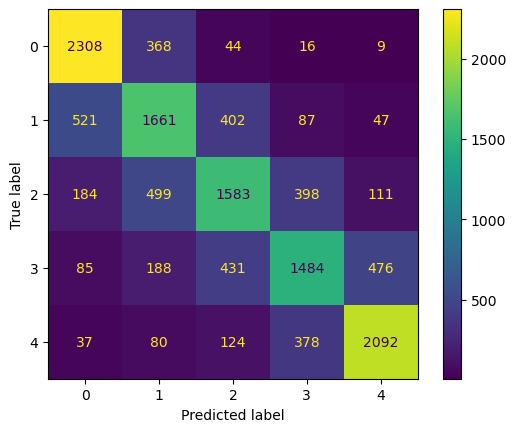

In [72]:
predictions = model_rfc.predict(train.drop(columns=['median_house_value_discrete']))

ConfusionMatrixDisplay.from_predictions(train['median_house_value_discrete'], predictions)
plt.show()

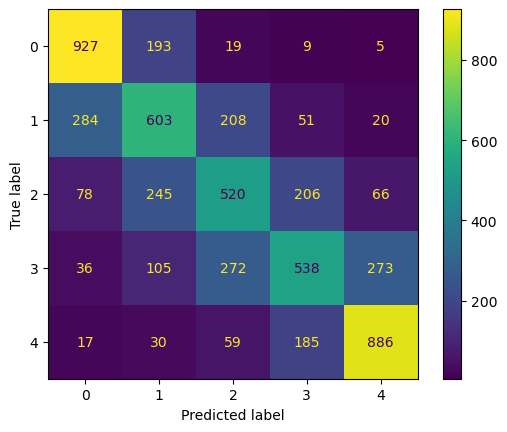

In [73]:
predictions = model_rfc.predict(test.drop(columns=['median_house_value_discrete']))

ConfusionMatrixDisplay.from_predictions(test['median_house_value_discrete'], predictions)
plt.show()

7.- Con el siguiente código podemos generar las curvas ROC y el AUC correspondiente

El método de pandas 'get_dummies' nos realiza el one hot encoding de nuestra variable categórica.

Esto es pasar de una variable con 5 valores (entre 0 y 4 dependiendo de la categoría)

In [74]:
test.median_house_value_discrete

9538     0
20231    4
9526     0
4222     3
20008    0
        ..
6609     2
20591    0
6156     1
14897    0
3710     2
Name: median_house_value_discrete, Length: 5835, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

A 5 variables con ceros cuando no pertenece a esa categoría y unos cuando sí lo hace

In [75]:
pd.get_dummies(test.median_house_value_discrete)

,0,1,2,3,4
9538,1,0,0,0,0
20231,0,0,0,0,1
9526,1,0,0,0,0
4222,0,0,0,1,0
20008,1,0,0,0,0
...,...,...,...,...,...
6609,0,0,1,0,0
20591,1,0,0,0,0
6156,0,1,0,0,0
14897,1,0,0,0,0


In [76]:
# Recuerda sustituir model_rfc por el nombre de tu modelo
predictions = model_rfc.predict_proba(train.drop(columns=['median_house_value_discrete']))

y_test = np.array(pd.get_dummies(train['median_house_value_discrete']))
y_score = predictions

n_classes = 5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], umbral = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

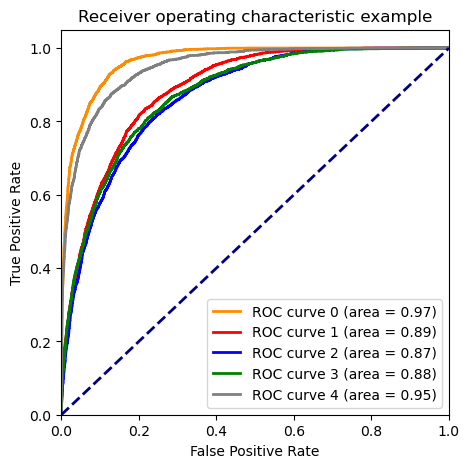

In [77]:
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve 0 (area = %0.2f)" % roc_auc[0],
)
plt.plot(
    fpr[1],
    tpr[1],
    color="red",
    lw=lw,
    label="ROC curve 1 (area = %0.2f)" % roc_auc[1],
)
plt.plot(
    fpr[2],
    tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve 2 (area = %0.2f)" % roc_auc[2],
)
plt.plot(
    fpr[3],
    tpr[3],
    color="green",
    lw=lw,
    label="ROC curve 3 (area = %0.2f)" % roc_auc[3],
)
plt.plot(
    fpr[4],
    tpr[4],
    color="grey",
    lw=lw,
    label="ROC curve 4 (area = %0.2f)" % roc_auc[4],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

7.- Repetimos pero con los datos de test

In [78]:
# Recuerda sustituir model_dtc por el nombre de tu modelo
predictions = model_rfc.predict_proba(test.drop(columns=['median_house_value_discrete']))

y_test = np.array(pd.get_dummies(test['median_house_value_discrete']))
y_score = predictions

n_classes = 5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], umbral = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

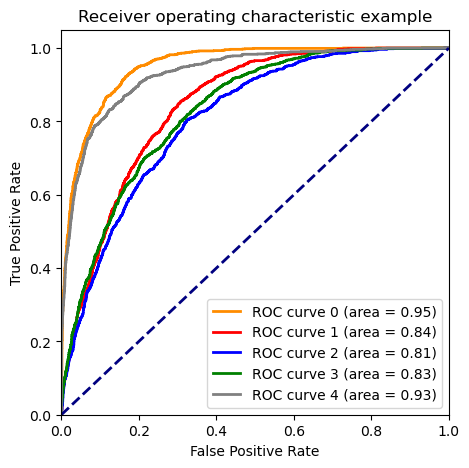

In [79]:
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve 0 (area = %0.2f)" % roc_auc[0],
)
plt.plot(
    fpr[1],
    tpr[1],
    color="red",
    lw=lw,
    label="ROC curve 1 (area = %0.2f)" % roc_auc[1],
)
plt.plot(
    fpr[2],
    tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve 2 (area = %0.2f)" % roc_auc[2],
)
plt.plot(
    fpr[3],
    tpr[3],
    color="green",
    lw=lw,
    label="ROC curve 3 (area = %0.2f)" % roc_auc[3],
)
plt.plot(
    fpr[4],
    tpr[4],
    color="grey",
    lw=lw,
    label="ROC curve 4 (area = %0.2f)" % roc_auc[4],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()